In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Statistical Mechanics
## Random Walk on a 2D lattice
Consider the random walk of $N$ particles on a $M \times M$ lattice.
Two particles cannot occupy the same lattice site.
On this lattice, periodic boundaries are used.
This means that when a particle leaves the lattice it returns on the opposite side of the lattice.

![random2d](https://bohrium.oss-cn-zhangjiakou.aliyuncs.com/article/12024/b612fb9b71d347f2a37c24212cf86389/f6e099d4-ada5-4845-8b1e-7ef7760ea189.png)

*A random walk of $N$ particles on a $M \times M$ lattice. One of the particles
 is chosen at random (the green one). Next, one of the four (up, down, left, right)
 directions is chosen. Only if the site is empty the jump is allowed. In this example
 the jump of the green particle to the left would be rejected. Particles leaving
 the lattice are put back at the other end of the lattice (periodic boundary conditions).*

1. What is the fraction of occupied sites ($\theta$) of the lattice as
a function of $M$ and $N$?

$\frac{N}{M^2}$

2. Make a plot of the diffusion coefficient $D$ as a function of
  $\theta$ for $M=32$. For low values of $\theta$, the diffusion
  coefficient can be approximated by
\begin{equation}
D \approx D_0 \left(1-\theta\right),
\end{equation}
where $D_0$ is the diffusion coefficient at inifite dilution (one
particle on an empty lattice).  Derive this equation. Why is this
equation not exact? 

In [2]:
def build_lattice(n: int, m: int) -> (np.ndarray, np.ndarray):
    """
    Create an m*m lattice with n particles.

    `lattice` is an m x m array of boolean values, `True` if the lattice site is occupied, `False` if not
    `coordinates` is an n x 2 array of particle coordinates
    """
    lattice = np.zeros(m * m, dtype=bool)
    occupied = np.random.choice(range(0, m*m), n, replace=False)
    lattice[occupied] = True
    lattice = lattice.reshape(m, m)
    assert lattice.sum() == n
    x, y = np.where(lattice)
    coordinates = np.vstack([x, y]).T

    return lattice, coordinates

In [10]:
def displace(coordinates: np.ndarray, n: int, m: int, lattice: np.ndarray) -> None:
    """
    Randomly select a particle and try to move it in a random direction.
    
    Args:
        coordinates: n x 2 array of particle coordinates
        n: number of particles
        m: lattice size
        lattice: m x m array, True if site is occupied
    """
    # Select a random particle
    particle_idx = np.random.randint(0, n)
    
    # Get current position
    x, y = coordinates[particle_idx]
    
    # Select a random direction (0: up, 1: right, 2: down, 3: left)
    direction = np.random.randint(0, 4)
    
    # Calculate new position based on direction
    if direction == 0:  # up
        new_x, new_y = x - 1, y
    elif direction == 1:  # right
        new_x, new_y = x, y + 1
    elif direction == 2:  # down
        new_x, new_y = x + 1, y
    else:  # left
        new_x, new_y = x, y - 1
    
    # Apply periodic boundary conditions
    new_x_index = new_x % m
    new_y_index = new_y % m
    
    # Check if the new position is empty
    if not lattice[new_x_index, new_y_index]:
        # Update lattice
        lattice[x%m, y%m] = False
        lattice[new_x_index, new_y_index] = True
        
        # Update coordinates
        coordinates[particle_idx, 0] = new_x
        coordinates[particle_idx, 1] = new_y

In [24]:
def main():
    """ Computes & plots the MSD of a 2D random walk of n particles on an m x m lattice. """

    m = 31
    time_origins = int(1e5)
    max_time = 50

    fig = plt.figure()
    ax = fig.add_subplot(111)

    msd = np.zeros(max_time + 1, dtype=float)
    number_of_particles = [1,5]

    for n in number_of_particles:
        print(f"running for {n} particles")
        lattice, coordinates = build_lattice(n, m)
        msd[:] = 0

        for origin in range(time_origins):
            initial_coordinates = coordinates.copy()
            for t in range(1, max_time + 1):
                displace(coordinates, n, m, lattice)
                displacement = coordinates - initial_coordinates
                msd[t] += ((displacement * displacement).sum(1)).mean()

        msd /= time_origins
        msd *= n # * number of particles, 每个\tau 时间只动了一个粒子，所以对粒子数目平均后要乘回来
        slope = linregress(range(0, max_time + 1), msd).slope
        plt.plot(msd, label=f"n, m = ({n},{m}); slope = {slope:.3f}, theory = {1-n/m**2:.3f}")

    ax.set_title("Mean-squared-displacement of a 2d random walk")
    ax.set_xlabel("time")
    ax.set_ylabel("<r2>")
    ax.set_xlim([0, max_time])
    ylims = ax.get_ylim()
    ax.set_ylim([0, ylims[1]])
    ax.legend()
    plt.show()


# if __name__ == "__main__":
#     # main()


3. Modify the program in such a way that the probability to jump in the x direction is larger than the probability to jump in the y
direction.
Explain the results.

running for 1 particles
running for 5 particles


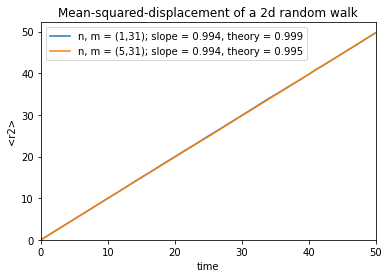

In [25]:
px = 0.8
def displace(coordinates: np.ndarray, n: int, m: int, lattice: np.ndarray) -> None:
    particle_idx = np.random.randint(0, n)
    x, y = coordinates[particle_idx]
    # select the x axis with px
    if np.random.rand() < px:
        # move in x direction
        direction = np.random.choice([-1, 1])
        new_x = x + direction
        new_y = y
    else:
        # move in y direction
        direction = np.random.choice([-1, 1])
        new_x = x
        new_y = y + direction

    new_x_index = new_x % m
    new_y_index = new_y % m
    if not lattice[new_x_index, new_y_index]:
        lattice[x%m, y%m] = False
        lattice[new_x_index, new_y_index] = True
        
        # Update coordinates
        coordinates[particle_idx, 0] = new_x
        coordinates[particle_idx, 1] = new_y

main()

4. Modify the program in such a way that periodic boundary
conditions are used in one direction only, and make the lattice boundaries hard walls in
the other directions, so that particles cannot escape, i.e. moves in these directions that cross
the lattice boundaries are rejected. What happens?

In [ ]:
def displace(coordinates: np.ndarray, n: int, m: int, lattice: np.ndarray) -> None:
    """
    Randomly select a particle and try to move it in a random direction.
    
    Args:
        coordinates: n x 2 array of particle coordinates
        n: number of particles
        m: lattice size
        lattice: m x m array, True if site is occupied
    """
    # Select a random particle
    particle_idx = np.random.randint(0, n)
    
    # Get current position
    x, y = coordinates[particle_idx]
    
    # Select a random direction (0: up, 1: right, 2: down, 3: left)
    direction = np.random.randint(0, 4)
    
    # Calculate new position based on direction
    if direction == 0:  # up
        new_x, new_y = x - 1, y
    elif direction == 1:  # right
        new_x, new_y = x, y + 1
    elif direction == 2:  # down
        new_x, new_y = x + 1, y
    else:  # left
        new_x, new_y = x, y - 1
    
    # Apply periodic boundary conditions
    new_x_index = new_x % m
    new_y_index = new_y % m
    
    # Check if the new position is empty
    if not lattice[new_x_index, new_y_index]:
        # Update lattice
        lattice[x%m, y%m] = False
        lattice[new_x_index, new_y_index] = True
        
        # Update coordinates
        coordinates[particle_idx, 0] = new_x
        coordinates[particle_idx, 1] = new_y

5. Modify the program in such a way that a certain fraction of the
particles are ``frozen''. Investigate the influence of the fraction of
frozen particles on the diffusion coefficient.